# GUC NETW 1003 Kmeans Assginmnet 

Objective: exercise is to learn how to use build and use  kmeans clustering algortrithm    

At the end of this lab you will be able to
> 1. Build and run a K-means algorithm.
> 2. Know how to evalute K-means Algorithm 
> 2. Understand the effect of the parmeters ont he perfromance of the algorithm .
> 3. Understand the effect of distance.

## 1. Wirte K means function 

import required libraries 

In [178]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
import scipy
from scipy.spatial.distance import correlation
from sklearn.model_selection import train_test_split

# the scaler - for standardisation
from sklearn.preprocessing import StandardScaler,MinMaxScaler

> ### 1.1. Code for the distance function 

write a function to calculate the distance between a set of cluster centroids and all the data points 

Cluster_Distances = GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type) 
* The function shoud be able to handel data points with any number of features and any number of points 
* The function should be able to handle any K number of cluster centroids 
* To inrease speed do that in matrix format using numpy
* This should produce a matrix with rows equal to data points columns equal K 
* You should be able to calculate different types of Distance. In this assginmnet you are required to implement the following two 
    - Ecluidian distance
    - Pearson correlation distance
  

In [216]:
def GUC_Distance ( X, centroids, Distance_Type ):
    Cluster_Distance = np.zeros((X.shape[0], centroids.shape[0]))
    for i in np.arange(centroids.shape[0]):
        if Distance_Type=='ecluidian distance':
            Cluster_Distance[:, i] = np.sqrt(np.sum(np.square(X - centroids[i]), axis = 1))
        if Distance_Type=='pearson distance':
            Cluster_Distance[:, i] = scipy.spatial.distance.correlation(X, centroids[i], w=None, centered=True)
    return Cluster_Distance 

In [217]:
centroids = np.array([[3, 5], [4, 2]])

angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()


GUC_Distance (X, centroids, 'ecluidian distance' )

array([[5.38516481, 3.60555128],
       [5.11893455, 3.48647098],
       [4.9262608 , 3.48951616],
       [4.83560943, 3.61409048],
       [4.86161834, 3.8371393 ],
       [5.        , 4.12310563],
       [5.22910478, 4.43485173],
       [5.51693226, 4.7398538 ],
       [5.82891495, 5.01208489],
       [6.13320219, 5.2318624 ],
       [6.40312424, 5.38516481],
       [6.6178931 , 5.46301383],
       [6.76254054, 5.46106921],
       [6.82765563, 5.3794377 ],
       [6.80916053, 5.22267767],
       [6.70820393, 5.        ],
       [6.53119156, 4.72568409],
       [6.289949  , 4.41970428],
       [6.00197889, 4.10840663],
       [5.6906793 , 3.82460663]])

> ### 1.2. Code for K means function 

> Loop until a stopping condition 

> > in the loop do the following 
> > 1. Cluster Assginmnet 
> > > * Use the GUC_Distance to calculate between each cluster head and all the points 
> > > * Find the value and index of the minimum distance  for each row. 
> > > * for each point in the row use the index of the minmum distance to represent the cluster Centroid that this point will belong to.
> > > * Calculate and record the mean square distance for each cluster  
> > > * Use the mean square distances to calculate a stopping condition (e.g the sum of mean distances)
> > 2. Updtate Centroids  
> > > * Update the value for the cluster heads by calculating the mean value for the points in each cluster 
> > >  * Calculate the Cluster Metric (Distortion Function)
> > > > a number indicating the how good the clusters are . An example cluster metric is the  (sum of squared error between each point and its cluster center) 

In [11]:
   # write code for intial cluster heads here 
       # write your your loop 
    
#def GUC_Kmean ( Data_points, Number_of_Clusters,  Distance_Type ):
 #   cluster_centroids = init_centroids(Number_of_Clusters, Data_points)
  #  cluster = [0]*len(Data_points)
   # change=100
    #while change>.001:
        #assign each point to a cluster
     #   cluster = [-1]*len(Data_points)
      #  for i in range(len(Data_points)): 
       #     distance_arr = []
        #    for j in range(k):
         #       distance_arr.append(GUC_Distance(data_points[i], cluster_centroids[j], Distance_Type))
          #  idx = np.argmin(distance_arr)
           # cluster[i] = idx
        #cluster=np.asarray(cluster)
        #calculate new centroids
        #new_centroids=[]
        #for i in range(Number_of_Clusters):
         #   arr = []
          #  for j in range(len(Data_points)):
           #     if cluster[j]==i:
            #        arr.append(Data_points[j])
            #new_centroids.append(np.mean(arr, axis=0))
        #new_centroids= np.asarray(new_centroids)
        #measure change
        #change = 0
        #for a,b in zip(cluster_centroids,new_centroids):
         #   change+=GUC_Distance(a,b,Distance_type)
        #luster_centroids= new_centroids
    
   # return cluster

In [225]:
def GUC_Kmean2(X,k,distance_type):
    
    centroids=[]
    #Cluster_Metric=[]
#intializa random centroids
    for i in np.arange(k):
        c1 = np.random.uniform(min(X[:,0]), max(X[:,0]))
        c2 = np.random.uniform(min(X[:,1]), max(X[:,1]))
        centroids.append([c1, c2])
    centroidsnp=np.array(centroids)
#print(centroidsnp)
    m, n = X.shape   
    id_of_cluster = np.zeros(X.shape[0]) 
    new_centroids = np.zeros((k, n))
    diff = 1
    mean_square_dist=np.zeros(X.shape[0]) 
#print('old',centroidsnp)
    temp=0
    while diff!=0:

        id_of_cluster = np.argmin(GUC_Distance (X, centroidsnp, distance_type ), axis = 1)
        #print(id_of_cluster)
       
    
        for i in np.arange(k):
            new_centroids[i] = np.mean(X[id_of_cluster == i], axis = 0)
        #print('new',new_centroids)
        for i in range(X.shape[0]):
               mean_square_dist[i] = np.sqrt(np.sum(np.square(X[i] - centroidsnp[id_of_cluster[i]])))
        stop=np.sum(mean_square_dist)
        #print('stop',stop)
        diff=temp-stop
        #print('diff',diff)
        temp=stop
    
        #print('temp',temp)
    
        new_centroids=centroidsnp
        cluster_metric=stop/X.shape[0]
    return [ new_centroids,id_of_cluster,cluster_metric] 

## 2. Display Results 

* below is a an example fuction that displayes Clusters in 2D 

* You need to change the function so that is can display an n dimension data in the form of pairs of subplot 2D figures 

* The function is a helper function that is originaly be found in 
https://www.coursera.org/learn/ibm-unsupervised-learning/


In [6]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

> #### 2.1. helper Display function 

In [24]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0, cluster_centers_ = [], labels_ = []):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[labels_==i,0],X[labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(cluster_centers_[i][0],cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

> #### 2.2. Example 1 : Circular Data Gen and display 

* below is an example of how to use the funciton 
  *  prepare the figure size and background 
   > * this part can be replaced by a number of subplots 
  
  * Produce a data set that represent the x and y o coordinates of a circle 
   > * this part can be replaced by data that you import froma file 
  
  * Data is displayed 
   > * to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 

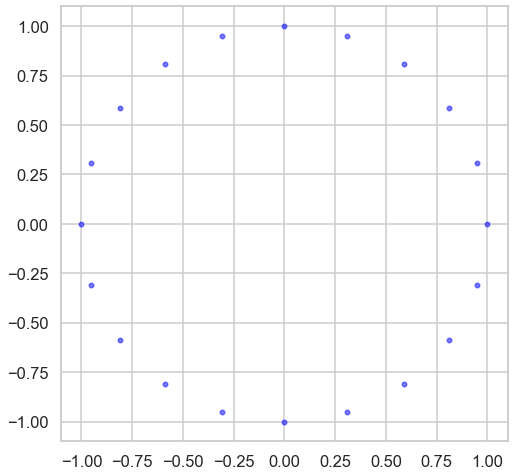

In [25]:
# prepare the figure sise and background 
# this part can be replaced by a number of subplots 
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")
# Produce a data set that represent the x and y o coordinates of a circle 
# this part can be replaced by data that you import froma file 

# Data is displayed 
# to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 
display_cluster(X)


> #### 2.3. Example 2 : Multi blob Data Gen and display 

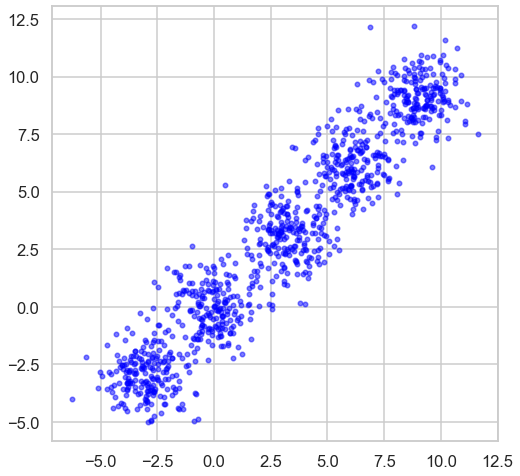

In [9]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X2, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
display_cluster(X2)

#### 2.3. Example 3 : moons Data Gen and display 

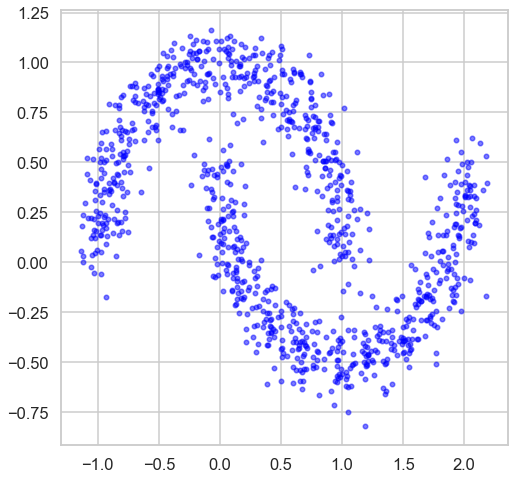

In [10]:
n_samples = 1000
X3, y3 = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
display_cluster(X3)

## 3. Testing the GUC_Kmean function on Simple 2D
1. Apply the GUC_Kmean fucntion to 2D Data provided by example 1, Example 2 and Example 3
2. Try a varing number of cluster centriods that range from 2 to 10 clusters on each set 
3. Display your results.
4. plot the Cluster perfromance Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

0.39995657309176846
[[ 0.76798871 -0.39130979]
 [ 0.13483617  0.85132205]
 [-0.42645481 -0.83696469]
 [-0.92778251  0.14694631]]
[0 0 1 1 1 1 1 1 3 3 3 3 2 2 2 2 0 0 0 0]


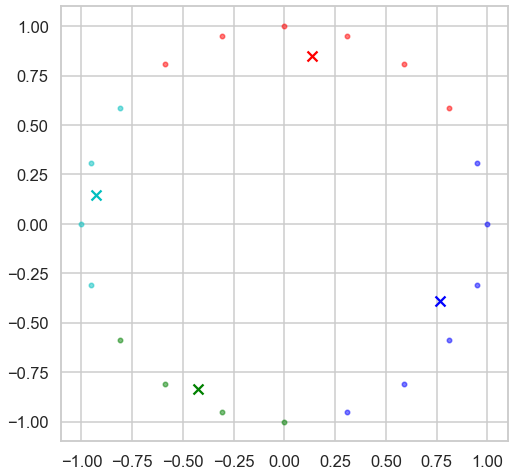

In [226]:
k = 4
new_centroids,id_of_cluster,cluster_metric= GUC_Kmean2(X,k,'ecluidian distance')
print(cluster_metric)
print(new_centroids)
print(id_of_cluster)
display_cluster(X, num_clusters=k, cluster_centers_ = new_centroids, labels_ = id_of_cluster)

In [239]:
z=2
distortion1 = []
distortion2 = []
z_arr=[]
while z<=10:
    i=1
    while i<=100:
        new_centroids,id_of_cluster,cluster_metric= GUC_Kmean2(X,z,'ecluidian distance')
        distortion1.append(cluster_metric)
        i=i+1
    distortion2.append(min(distortion1))
    z_arr.append(z)
    z=z+1
print(distortion2)    
print(z_arr)     
       
   

[0.7241739356110177, 0.5097707103960228, 0.3823900146812853, 0.31014509521437494, 0.2543627779318375, 0.21110055627315427, 0.19287852586217982, 0.17594578740468103, 0.16030234090065792]
[2, 3, 4, 5, 6, 7, 8, 9, 10]


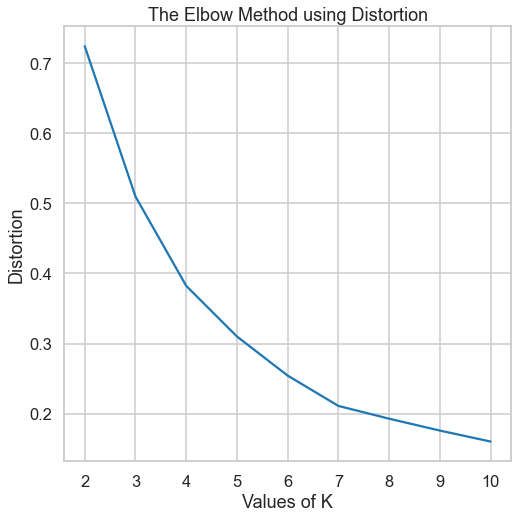

In [240]:
plt.plot(z_arr, distortion2)
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

2.039884342152071
[[ 3.62769403  3.46852464]
 [-1.67825828 -1.61919658]
 [ 7.99179172  8.13788028]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


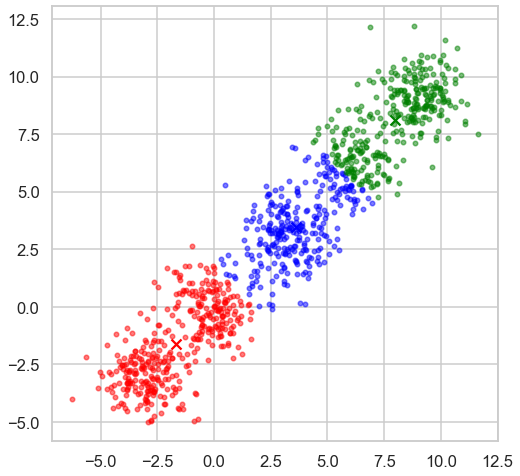

In [126]:
k = 3
new_centroids,id_of_cluster,cluster_metric= GUC_Kmean2(X2,k,'ecluidian distance')
print(cluster_metric)
print(new_centroids)
print(id_of_cluster)
display_cluster(X2, num_clusters=k, cluster_centers_ = new_centroids, labels_ = id_of_cluster)

In [241]:
z=2
distortion1 = []
distortion2 = []
z_arr=[]
while z<=10:
    i=1
    while i<=100:
        new_centroids,id_of_cluster,cluster_metric= GUC_Kmean2(X2,z,'ecluidian distance')
        distortion1.append(cluster_metric)
        i=i+1
    distortion2.append(min(distortion1))
    z_arr.append(z)
    z=z+1
print(distortion2)    
print(z_arr)   

[2.883091685698255, 2.0396634522250885, 1.6004221088991537, 1.219577364585102, 1.165032323948233, 1.109348514208476, 1.0620335063922517, 1.0129005182246926, 0.9742019322860853]
[2, 3, 4, 5, 6, 7, 8, 9, 10]


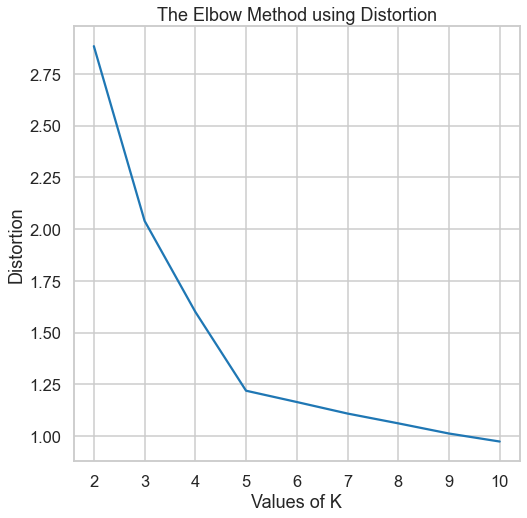

In [242]:
plt.plot(z_arr, distortion2)
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

0.2561170419241884
[[ 0.55856669 -0.36910014]
 [-0.86600402  0.42436657]
 [ 0.74357012  0.6123852 ]
 [ 1.88720515  0.09501557]
 [ 1.24692717 -0.37657656]
 [ 0.07269926  0.1293022 ]
 [-0.15596235  0.93436158]]
[6 5 3 5 2 5 3 4 2 3 2 3 5 2 5 6 1 4 4 5 6 2 6 2 4 0 1 6 5 3 0 2 1 6 6 0 2
 1 0 5 6 0 0 2 1 0 6 0 5 5 5 6 2 3 6 6 4 0 6 0 1 2 2 3 3 3 1 5 2 5 1 1 4 0
 2 4 4 4 1 3 6 0 1 2 2 2 3 5 0 6 1 0 1 2 3 6 5 1 4 6 1 2 5 6 1 3 3 4 1 6 6
 1 5 2 2 1 2 0 0 4 5 1 2 4 1 2 6 2 6 6 4 6 6 4 6 1 5 0 6 4 6 0 4 1 2 2 0 4
 4 6 4 4 5 2 1 6 0 0 3 1 6 1 2 0 6 4 1 4 3 3 3 1 3 6 2 4 2 6 2 6 4 4 2 2 2
 2 1 2 6 1 2 1 6 2 2 4 2 5 3 2 1 3 2 4 4 0 3 6 3 4 0 3 3 2 4 5 5 5 3 3 6 1
 6 3 3 1 1 4 4 0 3 0 1 1 5 4 4 6 5 5 1 3 0 2 5 2 1 6 2 1 1 0 5 3 2 6 1 1 2
 2 2 6 5 1 0 0 2 0 5 6 3 1 4 6 6 6 2 6 5 2 5 5 4 5 1 3 1 0 4 4 1 4 2 6 6 2
 2 1 1 5 5 6 2 5 1 1 0 2 5 1 3 3 3 6 6 6 1 4 2 4 5 6 3 0 4 4 5 6 5 1 0 2 2
 3 1 1 2 2 2 3 3 1 6 0 2 0 2 4 3 5 6 0 6 2 1 0 1 6 3 5 3 0 6 5 0 4 0 4 4 5
 1 5 1 1 0 2 1 3 6 4 3 1 3 1 6 5 1 4 4 2 

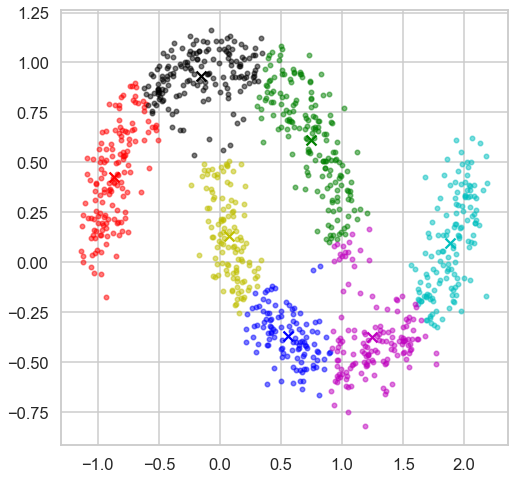

In [69]:
k = 7
new_centroids,id_of_cluster,cluster_metric= GUC_Kmean2(X3,k,'ecluidian distance')
print(cluster_metric)
print(new_centroids)
print(id_of_cluster)
display_cluster(X3, num_clusters=k, cluster_centers_ = new_centroids, labels_ = id_of_cluster)

In [243]:
z=2
distortion1 = []
distortion2 = []
z_arr=[]
while z<=10:
    i=1
    while i<=100:
        new_centroids,id_of_cluster,cluster_metric= GUC_Kmean2(X3,z,'ecluidian distance')
        distortion1.append(cluster_metric)
        i=i+1
    distortion2.append(min(distortion1))
    z_arr.append(z)
    z=z+1
print(distortion2)    
print(z_arr)   

[0.6064305219091556, 0.49432860035074977, 0.39666961653805527, 0.34048056677148314, 0.28720365515751767, 0.25604319432535544, 0.22486986341668147, 0.20751162055754668, 0.19103549710935727]
[2, 3, 4, 5, 6, 7, 8, 9, 10]


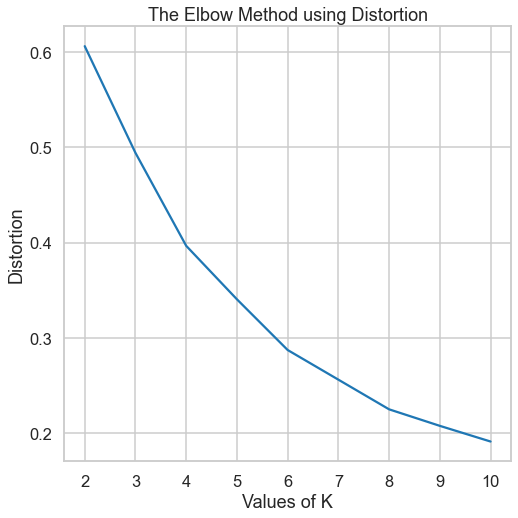

In [244]:
plt.plot(z_arr, distortion2)
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

## 4. Using the GUC_Kmean function to segment customers int he provided customer dataset
1. Apply the GUC_Kmean fucntion to customer data  
2. Try a varing number of cluster that range from 2 to 10 cluster on each set 
3. Display your results.
4. plot the Cluster Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

In [195]:
data = pd.read_csv('Customer data.csv',usecols=['Age','Income'])

In [196]:
data.head()

,Age,Income
0,67,124670
1,22,150773
2,49,89210
3,45,171565
4,53,149031


In [191]:

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(data)

# transform train and test sets
data_scaled = scaler.transform(data)
data_scaled = pd.DataFrame(X_train_scaled, columns=data.columns)
data_scaled.head()


,Age,Income
0,2.653614,0.097524
1,-1.187132,0.782654
2,1.117316,-0.833202
3,0.775916,1.328386
4,1.458716,0.736932


In [204]:
X_data = data_scaled.iloc[:, [0, 1]].values
X_data

array([[ 2.65361447,  0.09752361],
       [-1.18713209,  0.78265438],
       [ 1.11731585, -0.83320224],
       ...,
       [-0.41898277, -0.90695688],
       [-1.01643224, -0.60332923],
       [-0.93108232, -1.3789866 ]])

0.625243867984
[[ 1.90450738  0.6215276 ]
 [-0.30924716  0.56246471]
 [-0.80820684 -0.6905192 ]
 [ 0.48445525  2.77039255]
 [ 0.50001756 -0.46985627]]
[0 1 4 ... 2 2 2]


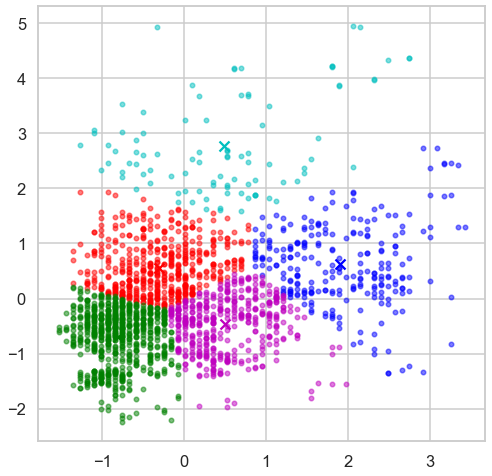

In [212]:
k = 5
new_centroids,id_of_cluster,cluster_metric= GUC_Kmean2(X_data,k,'ecluidian distance')
print(cluster_metric)
print(new_centroids)
print(id_of_cluster)
display_cluster(X_data, num_clusters=k, cluster_centers_ = new_centroids, labels_ = id_of_cluster)

In [ ]:
z=2
distortion1 = []
distortion2 = []
z_arr=[]
while z<=10:
    i=1
    while i<=100:
        new_centroids,id_of_cluster,cluster_metric= GUC_Kmean2(X_data,z,'ecluidian distance')
        distortion1.append(cluster_metric)
        i=i+1
    distortion2.append(min(distortion1))
    z_arr.append(z)
    z=z+1
print(distortion2)    
print(z_arr)   

In [ ]:
plt.plot(z_arr, distortion2)
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()